In [111]:
import torch
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets,transforms

In [112]:
train_data = datasets.FashionMNIST(
    root="data/fashion-mnist",download=True,train=True,transform=transforms.ToTensor()
    )

test_data = datasets.FashionMNIST(
    root="data/fashion-mnist",
    download=True,
    train=False,
    transform=transforms.ToTensor(),
)

In [113]:
len(train_data), len(test_data)

(60000, 10000)

In [114]:
img,label = train_data[0]
label,img

(9,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.00

In [115]:
classes_name = train_data.classes,
classes_name = classes_name[0]
len(train_data.classes), classes_name

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [116]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [117]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [123]:
img,label  = train_data[0]
print(f"image shape: {img.shape},\nlabel: {classes_name[label]}")

image shape: torch.Size([1, 28, 28]),
label: Ankle boot


Image shape: torch.Size([1, 28, 28])


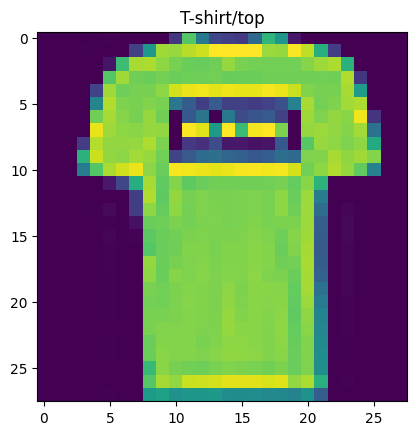

In [124]:
img,label = train_data[1]
plt.title(classes_name[label])
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze())

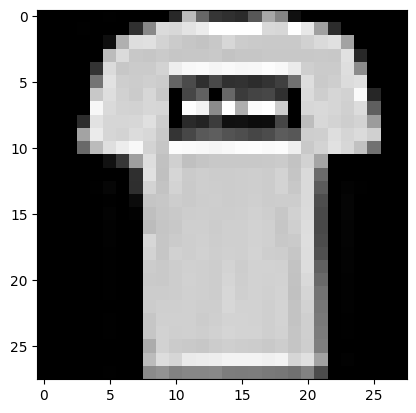

In [120]:
plt.imshow(img.squeeze(),cmap="gray")

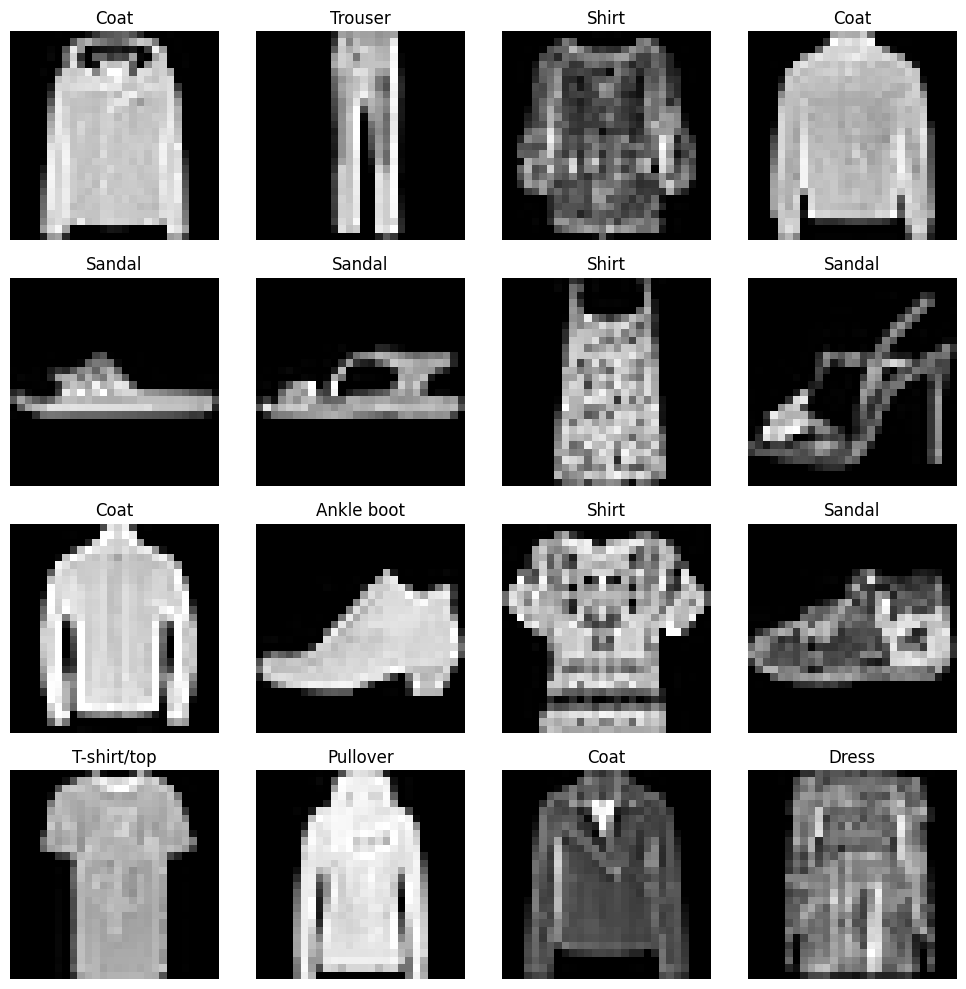

In [126]:
# torch.manual_seed(42)

fig = plt.figure(figsize=(10,10))

n_rows = 4
n_cols = 4

for i in range(1,n_rows * n_cols + 1):
    random_idx = torch.randint(low=0,high=len(train_data),size=(1,)).item()
    img,label = train_data[random_idx]
    fig.add_subplot(n_rows,n_cols,i)
    plt.title(classes_name[label])
    plt.imshow(img.squeeze(),cmap="gray")
    plt.axis(False)

plt.tight_layout()

In [122]:
a

NameError: name 'a' is not defined